# Titanic: Machine Learning from Disaster
# *using logistic regression

## Goals/Description of competition:

### tl;dr: Exercise in binary classification. Given training data, train a model to predict survived or not. Using this model, predict outcomes for test data set and submit to competition. Note: we are not limited to the features given, i.e. can create new ones.

### Also note: data is not very nice :( 

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Analysis Procedure

 - Collect training and test data
 - Explore data (quality, patterns, stats, viz)
 - Data cleaning/Feature engineering
 - Select, train, and fine-tune model 
 - Evaluate model on test data and submit

## Imports

In [1]:
# data analysis and data handling
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

***
# 1. Collect training and test data

## Read in data

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

## What are dimensions of the dataframes?

In [3]:
print('Shape of training set = {}'.format(train_df.shape))
print('_'*40)
print('Shape of testing set  = {}'.format(test_df.shape))

Shape of training set = (891, 12)
________________________________________
Shape of testing set  = (418, 11)


## Print first few rows of the dataframes

In [4]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Column descriptions:


**11 features, 2 targets**

 - `PassengerId`: _(numerical)_ Integer ID of passenger
 - `Survived`: _(Ordinal target)_ Flag in training set to indicate whether the passenger survived (=1) or not (=0)
 - `Pclass`: _(Ordinal feature)_ Ticket class, 1 = 1st (Upper, i.e. Rose), 2 = 2nd (Middle), 3 = 3rd (Lower, i.e. Jack)
 - `Name`: _(String feature)_ Name of passenger, surname first, includes title of passenger
 - `Sex`: _(Categorical feature)_ string 'male' or 'female'
 - `Age`: _(Numerical feature)_ age of passengger in years. is fractional if less than 1. If age is estimated, it is in the form of xx.5
 - `SibSp`: _(Ordinal feature)_ # of siblings / spouses aboard the Titanic. Sibling = brother, sister, stepbrother, stepsister. Spouse = husband, wife (mistresses and fiances were ignored)
 - `Parch`: _(Ordinal feature)_ # of parents / children aboard the Titanic. Parent = mother, father. Child = daughter, son, stepdaughter, stepson. Some children travelled only with a nanny, therefore `Parch = 0` for them.
 - `Ticket`: _(alpha-numerica string feature)_ Ticket number (string type)
 - `Fare`: _(Numerical feature)_ passenger fare, i.e. cost of the ticket
 - `Cabin`: _(alpha-numeric string feature)_ cabin number of passenger's room. **Apparently, only 1st class has this**
 - `Embarked`: _(Categorical feature)_ Port of embarkation. C = Cherbourg, Q = Queenstown (now Cobh), S = Southampton

**Note: test data set does not have `Survived` target**

In [6]:
print(train_df.columns)
print('_'*40)
print(test_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
________________________________________
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## Double check data types of columns in dataframes

In [7]:
print(train_df.dtypes)
print('_'*40)
print(test_df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
________________________________________
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


***
# 2. Explore data (data quality, stats, viz, patterns)

## How many samples in each column are NULL/NaN values?

In [8]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Conclusions/decisions from above:

 - Many ages are missing. Historically, age was an important factor in surviving the titanic disaster. Will have to see if the data indicates that as well (~20% of ages are missing from BOTH training and test data) 
 - A LOT of cabin info is missing, since cabins were only assigned to first class passengers. This indicates that first class passengers are a minority in these samples. Should double check that if a passenger is 1st class, then they have a cabin assigned. If not, would have to do some special stuff to fill in the blanks if we want. (77-78% of samples lack a cabin)
 - There are a couple of embarkation ports missing in the training data, but none are missing in the test data. Might just drop those samples/passengers, or could try some modelling to fill in the gaps for the missing two. This coul be something we play with, since I am not sure what the right answer is, and it is the case for only 2 samples. (~0.2% of passengers in training data are lacking this data)
 - one fare in test data is missing

## Print dataframe info for double checking

In [10]:
print(train_df.info())
print('_'*40)
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non

## How many passengers in training data survived/didn't survive?

In [11]:
train_df.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

## Print some high-level stats for dataframes

In [12]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Conlusions/Decisions from above:

 - ~38% survival rate
 - Most passengers in 2nd or 3rd class. At least 50% of passengers are in 3rd class.
 - Mean and median age in late twenties. 50% of passengers are aged between ~20 and 38 years old. 
 - On average, passengers travelling with 0.5 siblings/spouses. Median is zero though, so at least 50% of passengers not travelling with siblings/spouses
 - On average, passengers travel with 0.38 parents/children. Median, 25th, and 75th percentile are zero, though, so, at least 75% of passengers are not travelling with parents/children.
 - Average fare is ~\\$32. Median is ~\\$14.5. Fares are skewed quite a lot towards higher fares.

In [13]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Lemberopolous, Mr. Peter L",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


### Conclusions/decisions from above:

 - Every passenger has a unique name
 - ~65% of passengers in training data are male
 - Tickets can be duplicate --> Not sure what these represent then
 - Cabins can be duplicate, so, more than one person can be assigned to a cabin. Number of duplicates for a passenger might correspond to sibsp and/or Parch 
 - Most popular port of embarkation is 'S', Southampton, ~72% of passengers in training data embarked from here

In [14]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Conclusions/decisions from above:

 - **Pretty much the same observations as with the training data**

In [15]:
test_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Sadowitz, Mr. Harry",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


### Conclusions/decisions from above:

 - **Pretty much the same observations as with the training data**

## Plot histograms of numerical columns in training data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25f85ba8>,
      dtype=object)

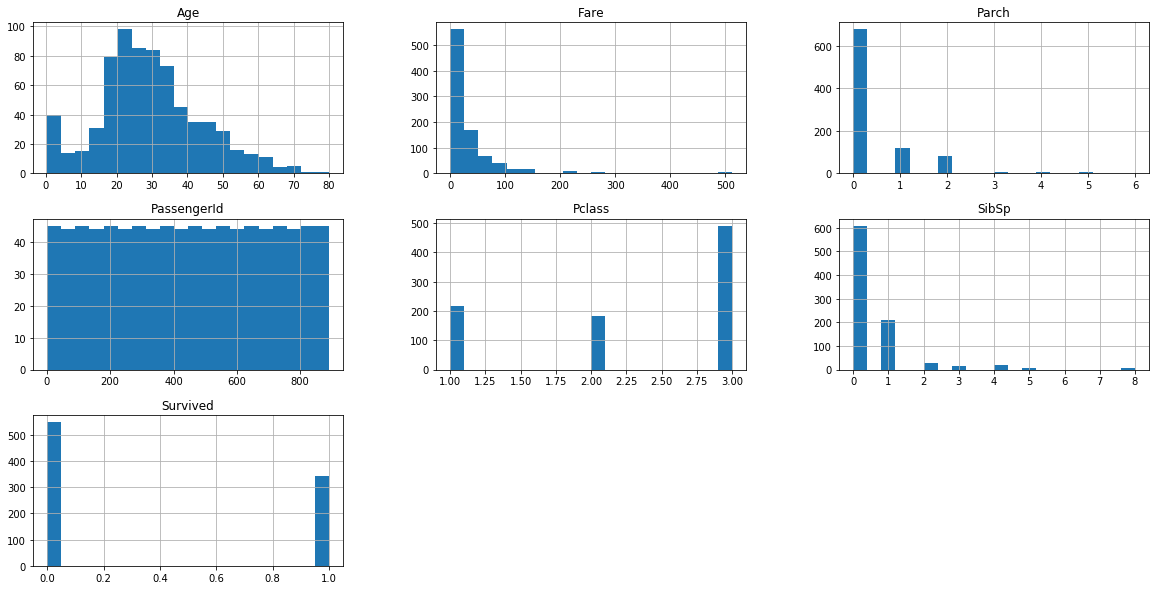

In [16]:
train_df.hist(figsize=(20,10), layout=(3,3), bins=20)

### Conclusions/decisions from above:

Not many conclusions can be drawn from the above plot. 
 - Age: Central age is ~25, and there is a bump at very young ages.
 - Fare: Most fares were relatively low.
 - Parch: Number of parents/children tends to zero.
 - Pclass: Most passengers were in 2nd and 3rd(!) class.
 - SibSp: Most passengers were travelling with 1 or fewer siblings/spouses

## Plot box and whisker plots of numerical training data

PassengerId       AxesSubplot(0.125,0.657941;0.227941x0.222059)
Survived       AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Pclass         AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Age               AxesSubplot(0.125,0.391471;0.227941x0.222059)
SibSp          AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Parch          AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Fare                 AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

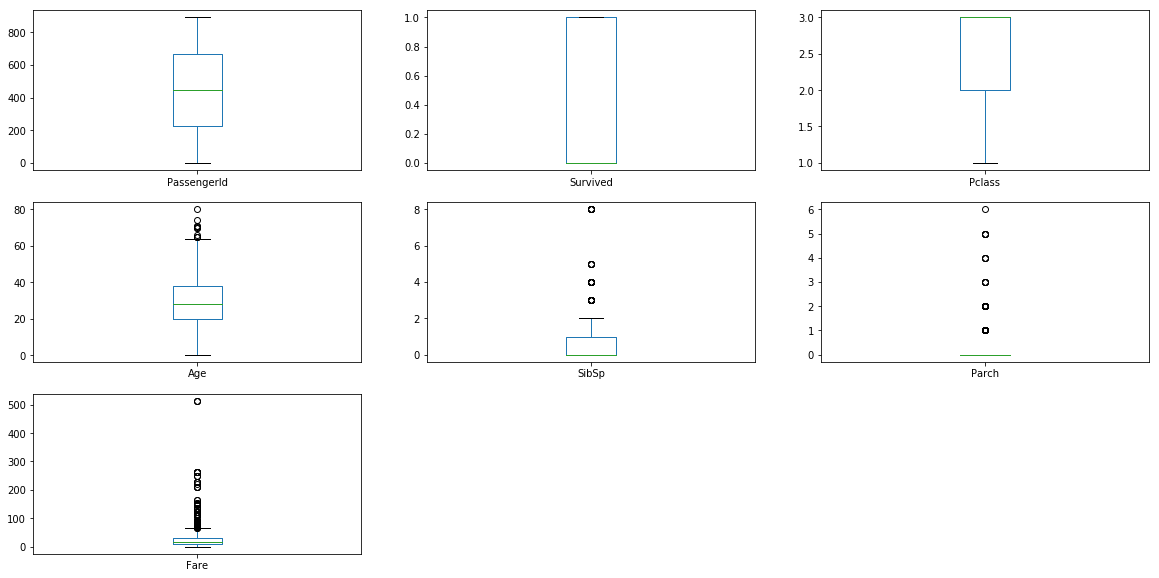

In [17]:
train_df.plot(
    figsize=(20,10), 
    kind='box', 
    sharex=False, 
    subplots=True, 
    layout=(3,3)
)

### Conclusions/decisions from above:

The same conclusions can be drawn from the histogram plot above this box and whisker plot. This plot is here mostly for completeness and reference for how to plot a box and whisker plot straight from a pandas dataframe.

## Plot 2D scatter plots of numerical training data (with relation to survival)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27039048>,
      dtype=object)

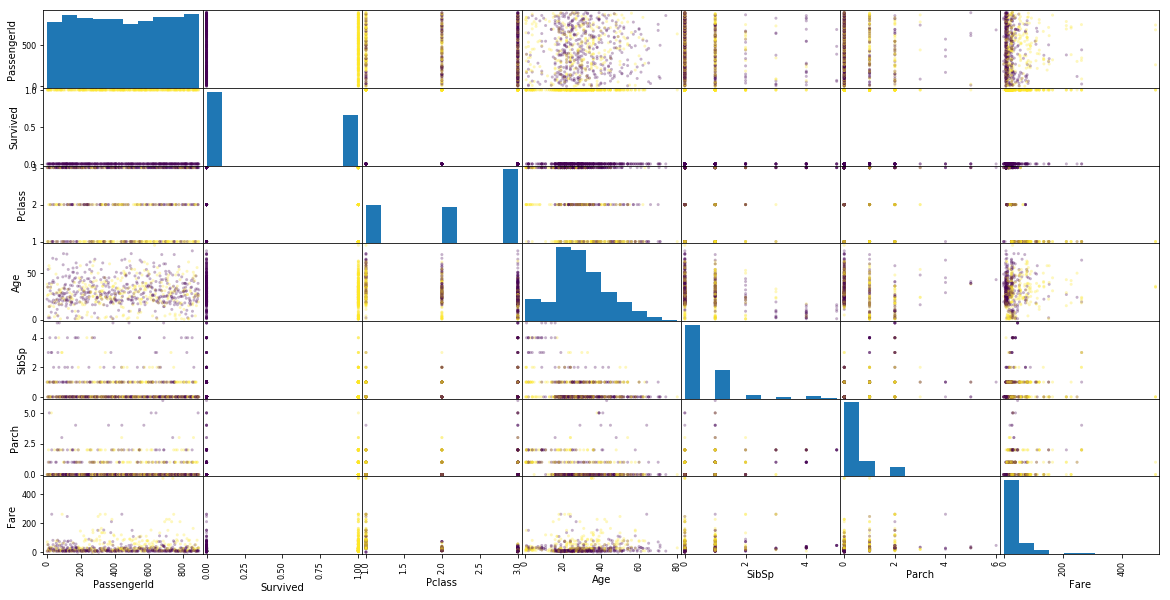

In [18]:
#from pandas.plotting import scatter_matrix
temp_filtered_df = train_df[train_df['Age'].notnull()]
pd.plotting.scatter_matrix(
    temp_filtered_df, 
    figsize=(20,10), 
    c=temp_filtered_df['Survived'], 
    alpha=0.3
)
#plt.legend(loc = 'best')

### Conclusions/decision from above: 

It is very difficult to pick out relations between attributes with regards to survival. (Also, not sure which colour corresponds to survived and not survived). Have to dig in a bit more.

## Plot correlation matrix of numerical training data

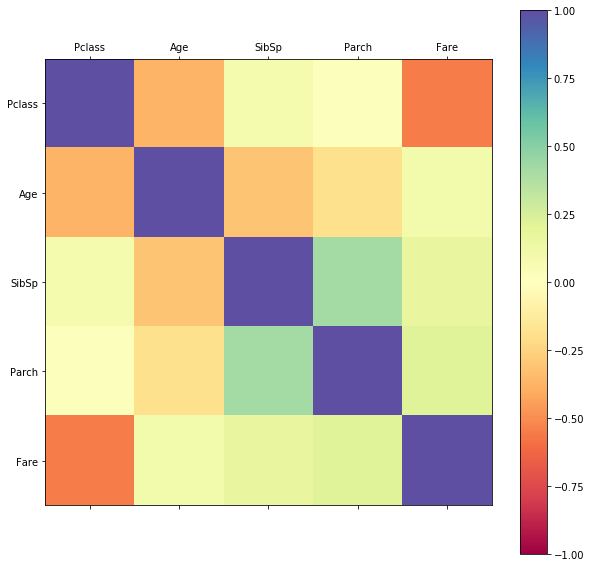

In [19]:
names = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
corr_train_df = train_df[names].corr()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
corr_plot = ax.matshow(corr_train_df, vmin=-1, vmax=1, cmap='Spectral')
fig.colorbar(corr_plot)
ticks = np.arange(0,5,1) # total 6 items
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

### Conclusions/decisions from above:

 - Pclass and Fare are negatively correlated --> Upper class tend to pay higher fare
 - Age and Pclass seems to be slightly negatively correlated --> older people tend to be more from upper class
 - Age and SibSp seems to be slightly negatively correlated --> Younger passengers tend to have more siblings/spouses
 - SibSp and Parch seems to be slightly positively correlated --> Passengers travelling with siblings/spouses tend to also be travlling with parents/children (Maybe this is just families travelling together?)
 - **All other combinations --> doesn't seem to be a definite correlation between them**

## Analyze survival rate as related to (categorical and ordinal) features

Can only do this for features that contain no NaN values (So, can't do this for Age, embark, and cabin). Also, would be easiest to only do this for categorical features (Pclass, Sex, Parch, SibSp). (Note, in general this could be done for all features, but at this point we do have features that contain NaN values and not all features are binned/categorized).

In [20]:
(
    train_df[['Pclass', 'Survived']]
    .groupby(['Pclass'], as_index=False)
    .mean()
    .sort_values(by='Survived', ascending=False)
)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [21]:
(
    train_df[['Sex', 'Survived']]
    .groupby(['Sex'], as_index=False)
    .mean().sort_values(by='Survived', ascending=False)
)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [22]:
(
    train_df[['SibSp', 'Survived']]
    .groupby(['SibSp'], as_index=False)
    .mean()
)

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [23]:
(
    train_df[['Parch', 'Survived']]
    .groupby(['Parch'], as_index=False)
    .mean()
)

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [24]:
(
    train_df[['Embarked', 'Survived']]
    .groupby(['Embarked'], as_index=False)
    .mean()
    .sort_values(by='Survived', ascending=False)
)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


### Conclusions/decisions from above: 

 - Pclass: Strong correlation between class and survival rate. 1st class passengers are more likely to survive, 3rd class are least likely. 
 - Sex: Strong correlation between sex and survival. ~74% of females survived.
 - SibSp: Appears to be a negative correlation between survival and SibSp
 - Parch: No trend between survival and Parch is super evident
 - Embarked: No definite relationship between port of embarkation and survival. There appears to be a slight trend that embarking at 'S' correlates with not surviving (~33% survived). Conversely, passengers embarking from 'C' had a ~55% survival fraction.

**Parch and Sibsp: What IS CLEAR is that travelling with a larger number of siblings/spouses or parents/children DOES RESULT IN A LOW SURVIVAL RATE**. This indicates that passengers belonging to larger families that are travelling together will probably not survive. Should include this as an engineered feature and see what trends come about. Does "family size" and survival rate correlate with class? (i.e. which classes tend to have larger families --> it is known that upper class passengers have higher survival rate, so my hypothesis is that large families tend to be from lower classes). 

**Can test this with current features below:**

In [25]:
(
    train_df[['Pclass', 'SibSp', 'Survived']]
    .groupby(['Pclass', 'SibSp'], as_index=False)
    .mean()
    .sort_values(by='Survived', ascending=False)
)

,Pclass,SibSp,Survived
7,2,3,1.000000
2,1,2,0.800000
1,1,1,0.746479
3,1,3,0.666667
5,2,1,0.581818
0,1,0,0.562044
6,2,2,0.500000
4,2,0,0.416667
10,3,2,0.333333
9,3,1,0.325301


In [26]:
(
    train_df[['Pclass', 'Parch', 'Survived']]
    .groupby(['Pclass', 'Parch'], as_index=False)
    .mean()
    .sort_values(by='Survived', ascending=False)
)

,Pclass,Parch,Survived
7,2,3,1.000000
6,2,2,0.812500
2,1,2,0.761905
5,2,1,0.750000
1,1,1,0.677419
0,1,0,0.607362
9,3,1,0.363636
4,2,0,0.358209
11,3,3,0.333333
10,3,2,0.255814


### Conclusions/decisions from above:

 - Still not clear whether being in 3rd class correlates with not surviving (already known) or if family size has any impact. This does motivate the need to engineer a new feature and check, though!

## Analyze survival related to individual numerical features (with visualization)

Mean age relative to survival:
   Survived        Age
0         0  30.626179
1         1  28.343690
Median age relative to survival:
   Survived   Age
0         0  28.0
1         1  28.0


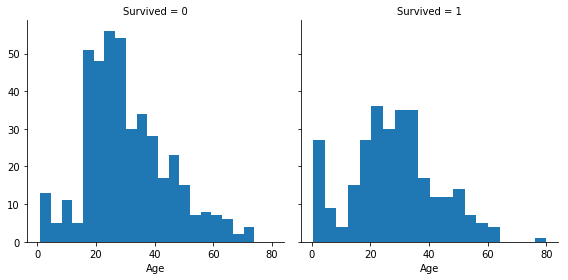

In [27]:
sns.FacetGrid(train_df, col='Survived', height=4, aspect=1).map(plt.hist, 'Age', bins=20)

print("Mean age relative to survival:")
print(train_df[['Age', 'Survived']].groupby(['Survived'], as_index=False).mean())
print("Median age relative to survival:")
print(train_df[['Age', 'Survived']].groupby(['Survived'], as_index=False).median())

### conclusions/decisions from above:

 - Many infants survived
 - Mean age is slightly younger for survived than not survived
 - Median age is same for survived and did not survive
 - Histograms appear to show that more younger (between age ~16-32) passengers did not survive

Mean fare relative to survival:
   Survived       Fare
0         0  22.117887
1         1  48.395408
Median fare relative to survival:
   Survived  Fare
0         0  10.5
1         1  26.0


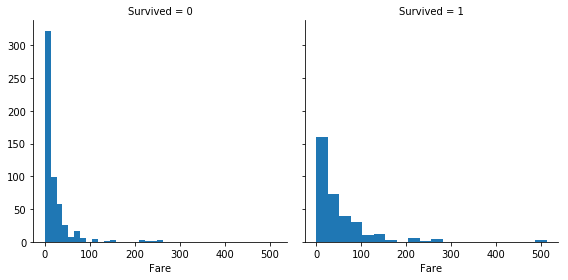

In [28]:
sns.FacetGrid(train_df, col='Survived', height=4, aspect=1).map(plt.hist, 'Fare', bins=20)

print("Mean fare relative to survival:")
print(train_df[['Fare', 'Survived']].groupby(['Survived'], as_index=False).mean())
print("Median fare relative to survival:")
print(train_df[['Fare', 'Survived']].groupby(['Survived'], as_index=False).median())

### conclusions/decisions from above:

 - More higher fares tended to survive, more lower fares tended not to survive. This could be linked to fare<->class relationship

## Analyze survival related to SibSp and Parch with viz (follow up from tables above)

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


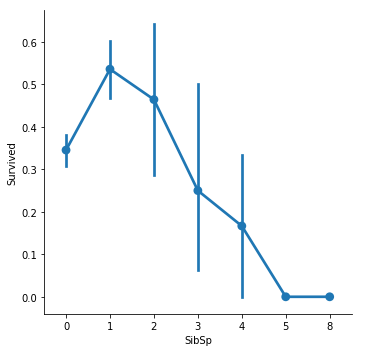

In [29]:
grid = sns.FacetGrid(train_df, height=5, aspect=1)
grid.map(sns.pointplot, 'SibSp', 'Survived', ci=95)
grid.add_legend()

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


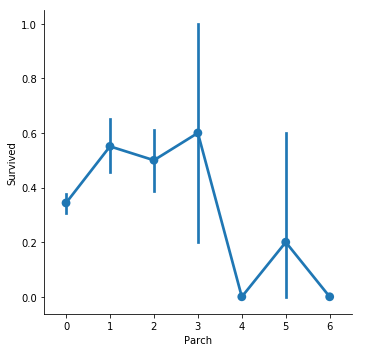

In [30]:
grid = sns.FacetGrid(train_df, height=5, aspect=1)
grid.map(sns.pointplot, 'Parch', 'Survived', ci=95)
grid.add_legend()

### conclusions/decisions from above:

 - There does appear to be a trend of increasing survival with decreasing SibSp
 - No clear trend for Parch
 - Passengers travelling alone do not have maximum survival rate
 - Passengers travelling with relatively large number of SibSp or Parch seem to have low survival rate
 - Confirms that we should engineer a family size feature and test correlation with survival

## Analyze survival as a function of combinations of (numerical, ordinal, categorical) features, with visualization

### ordinal and numerical features

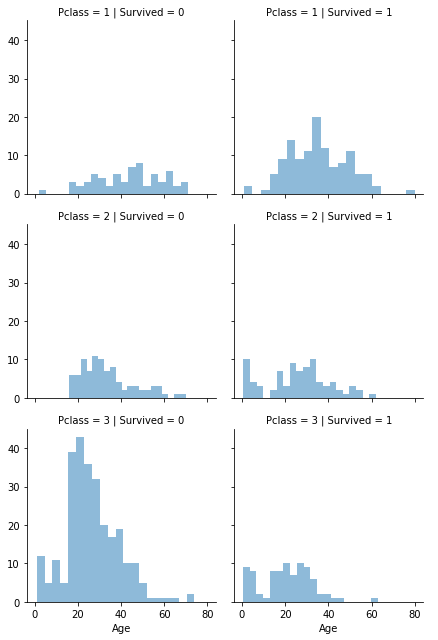

In [31]:
sns.FacetGrid(
    train_df, 
    col='Survived', 
    row='Pclass', 
    height=3, 
    aspect=1
).map(
    plt.hist, 
    'Age', 
    alpha=.5, 
    bins=20
).add_legend();

### conclusions/decisions from above:

 - Most 3rd class did not survive, most 1st class did survive. infants in all classes tended to survive

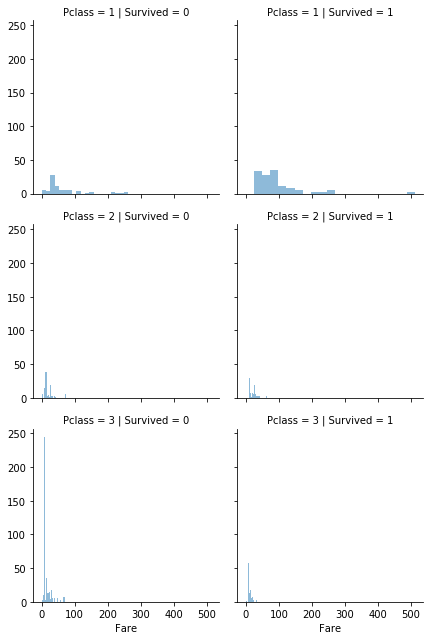

In [32]:
sns.FacetGrid(
    train_df, 
    col='Survived', 
    row='Pclass', 
    height=3, 
    aspect=1
).map(
    plt.hist, 
    'Fare', 
    alpha=.5, 
    bins=20
).add_legend();

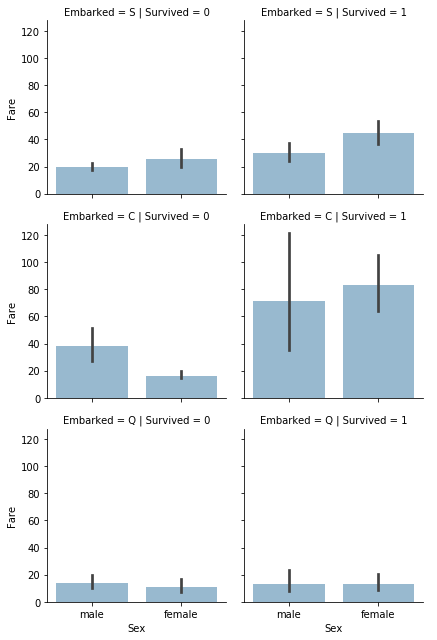

In [33]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=3, aspect=1)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=95, order=['male', 'female'])
grid.add_legend()

### conclusions/decisions from above:

 - 1st class paid higher fares, lower classes paid less, makes sense --> higher fare correlates with higher survival
 - within first class, survivors paid even higher fares. This indicates subgroups of 1st class, possibly related to cabin
 - lowest fares (most from 3rd class) had highest mortality fraction

### correlation between categorical features

Embarked  Pclass  Sex   
C         1       female     43
                  male       42
          2       female      7
                  male       10
          3       female     23
                  male       43
Q         1       female      1
                  male        1
          2       female      2
                  male        1
          3       female     33
                  male       39
S         1       female     48
                  male       79
          2       female     67
                  male       97
          3       female     88
                  male      265
dtype: int64

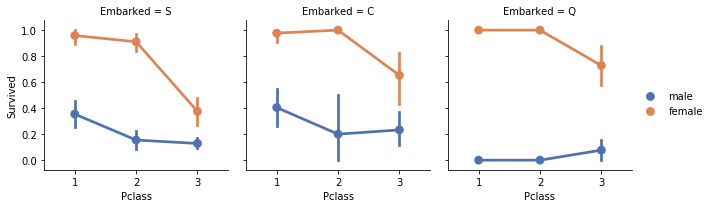

In [34]:
grid = sns.FacetGrid(train_df, col='Embarked', height=3, aspect=1)
grid.map(sns.pointplot, 
         'Pclass', 
         'Survived', 
         'Sex', 
         order = [1,2,3], 
         hue_order=['male', 'female'], 
         palette='deep', 
         ci=95
        )
grid.add_legend()

(
    train_df[['Embarked', 'Pclass', 'Sex']]
    .groupby(['Embarked', 'Pclass', 'Sex'], as_index=False)
    .size()
)

In [35]:
(
    train_df[['Embarked']]
    .groupby(['Embarked'], as_index=False)
    .size()
)

Embarked
C    168
Q     77
S    644
dtype: int64

### conclusions/decisions from above:

 - females have a higher survival fraction (confrimed) across all classes and ports of embarkation
 - could drop embarkation. However, from tables above ^^^^ there might be a small correlation between `Embarked` and overall survival (i.e. higher survival from embark = C)
 - Most people embarked at `Embarked` = S

## Summary of (training) data exploration (data quality, stats, viz, patterns)

### Single feature relations to survival:

 - `Pclass`: Upper class passengers tended to survive (~63% survived), lower class passengers tended to not survive (~24% survived)
 - `Sex`: About 64% of passengers were male. Females tended to survive (74% of females and 19% of males survived)
 - `Age`: Infants tended to survive, passengers between age ~16-32 tended to not survive, especially in 3rd class
 - `SibSp` and `Parch`: Appears to be a negative correlation between SibSp and survival, and no clear trend exists between Parch and survival. There does seem to be a slight trend that larger SibSp or Parch correlates with not surviving. This could indicate that larger "family size" correlates with not surviving. It is unclear whether family size also correlates with class at this point. Travelling alone also seems to correlate with low survival.
 - `Ticket`: Did not analyze. These values are alpha-numeric strings. Not sure what they represent or how they correlate. There is some duplication/degeneracy in string values, though.
 - `Fare`: Larger fares tended to survive while lower fares tended not to survive. Fare could correlate with class.
 - `Cabin`: Did not analyze. Only not NaN for first class passengers. Not sure what it represents. There could be subgroups within 1st class with differing relations to survival where `cabin` might be useful.
 - `Embarked`: ~72% of passengered embarked from 'S' (Southampton). There is no definite/overly obvious relation between port of embarkation and survival. However, there does appear to be a slight trend/correlation that passengers embarking from 'S' (and 'Q') were less likely to survive (~33% and ~38% survival fraction, respectively) than those embarking from 'C' (~55% survival fraction).

### Conclusions and decision made going further:

 - Drop `Cabin` and `Ticket` in modelling. Not sure how they relate. Could explore this further down the road
 - Create new feature "family size" that combines `SibSp` and `Parch`, and see its relation with survival. If it does correlate, then drop `SibSp` and/or `Parch`. 
 - Could complete `Age` feature and fill missing values somehow.
 - Could complete `Embarked`, 2 missing values in training data.
 - Could complete `Cabin`, or feature engineer (sublcasses of first class that have better survival fractions). For now, drop since there are NaN values for classes 2 and 3, and see how things perform
 - 1 `Fare` value missing for test data. Could complete it using some modelling.
 - Could extract something useful out of `Name`, like the title of the person --> could correlate with survival (i.e. sex, status, etc). For now, drop this column, and see how things perform.
 - **DROP**: `Cabin`, `Ticket`, `Name`. _Will also need to drop `PassengerId` before modelling --> just assign a copy with this column for X values in modelling_.

***
# 3. Data cleaning/Feature selection/Feature engineering

## Test FamilySize feature

In [36]:
test_feature_df = train_df.copy()

test_feature_df['FamilySize'] = test_feature_df['SibSp'] + test_feature_df['Parch'] + 1

In [37]:
print(
    test_feature_df[['FamilySize', 'Survived']]
    .groupby(['FamilySize'], as_index=False)
    .mean()
)
print(
    test_feature_df[['FamilySize']]
    .groupby(['FamilySize'], as_index=False)
    .size()
)
print (
    test_feature_df[['FamilySize', 'Pclass']]
    .groupby(['Pclass', 'FamilySize'], as_index=False)
    .size()
)

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000
FamilySize
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
dtype: int64
Pclass  FamilySize
1       1             109
        2              70
        3              24
        4               7
        5               2
        6               4
2       1             104
        2              34
        3              31
        4              13
        5               1
        6               1
3       1             324
        2              57
        3              47
        4               9
        5              12
        6              17
        7              12
        8               6
        11              7
dtype: int64


/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


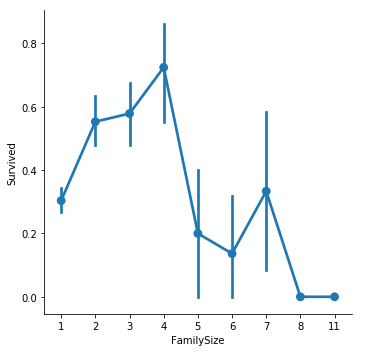

In [38]:
grid = sns.FacetGrid(test_feature_df, height=5, aspect=1)
grid.map(sns.pointplot, 'FamilySize', 'Survived', ci=95)
grid.add_legend()

In [39]:
print(
    test_feature_df[['FamilySize', 'Sex', 'Survived']]
    .groupby(['FamilySize', 'Sex'], as_index=False)
    .mean()
)
print(
    test_feature_df[['FamilySize', 'Sex', 'Survived']]
    .groupby(['FamilySize', 'Sex'], as_index=False)
    .size()
)

    FamilySize     Sex  Survived
0            1  female  0.785714
1            1    male  0.155718
2            2  female  0.816092
3            2    male  0.243243
4            3  female  0.775510
5            3    male  0.396226
6            4  female  0.842105
7            4    male  0.500000
8            5  female  0.250000
9            5    male  0.000000
10           6  female  0.375000
11           6    male  0.000000
12           7  female  0.375000
13           7    male  0.250000
14           8  female  0.000000
15           8    male  0.000000
16          11  female  0.000000
17          11    male  0.000000
FamilySize  Sex   
1           female    126
            male      411
2           female     87
            male       74
3           female     49
            male       53
4           female     19
            male       10
5           female     12
            male        3
6           female      8
            male       14
7           female      8
            male

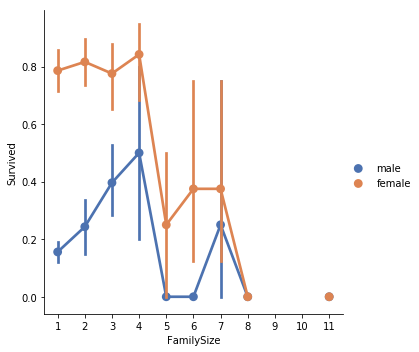

In [40]:
grid = sns.FacetGrid(test_feature_df, height=5, aspect=1)
grid.map(
    sns.pointplot, 
    'FamilySize', 'Survived', 'Sex', 
    order = [1,2,3,4,5,6,7,8,9,10,11], 
    hue_order=['male', 'female'], 
    palette='deep', 
    ci=95
)
grid.add_legend()

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


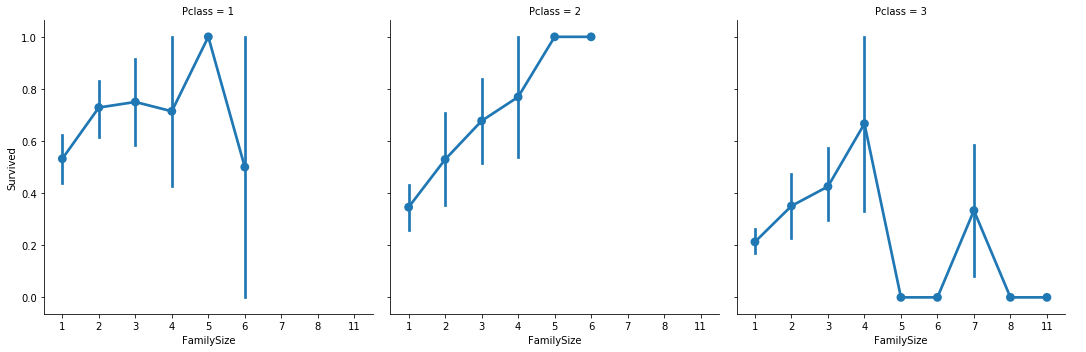

In [41]:
grid = sns.FacetGrid(test_feature_df, col='Pclass', height=5, aspect=1)
grid.map(sns.pointplot, 'FamilySize', 'Survived', ci=95)
grid.add_legend()

### Conclusions/decisions from above:

 - It seems that there is an optimum, or close to, family size for survival
 - Small family sizes, in particular = 1, there is <50% fraction of survival. These are mostly male passengers. Most people in training data fall in this familysize (travelling alone)
 - Survival fraction increases up to familysize = 4, after which it drops off. This indicates that people travelling alone, or nearly so (males especially), and people with large family sizes were less likely to survive --> most people with large families are from 3rd class as well
 - **decision**: engineer `FamilySize` as a feature. Also, keep `SibSp` since there is a clear relation between it and survival. **Drop `Parch` since there is no clear trend between it and survival**.
 - Consider engineering an is alone feature since there seems to be a tight correlation between family size = 0 and not surviving
 

## Test IsAlone feature

In [42]:
test_feature_df = train_df.copy()

test_feature_df['FamilySize'] = test_feature_df['SibSp'] + test_feature_df['Parch'] + 1

test_feature_df['IsAlone'] = (test_feature_df['FamilySize'] == 1).astype(int)

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


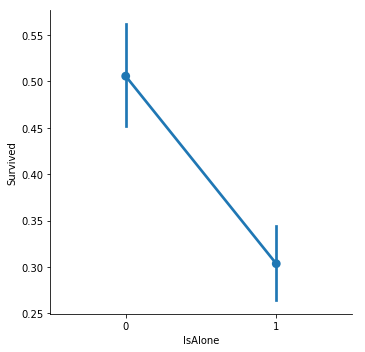

In [43]:
grid = sns.FacetGrid(test_feature_df, height=5, aspect=1)
grid.map(sns.pointplot, 'IsAlone', 'Survived', ci=95)
grid.add_legend()

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


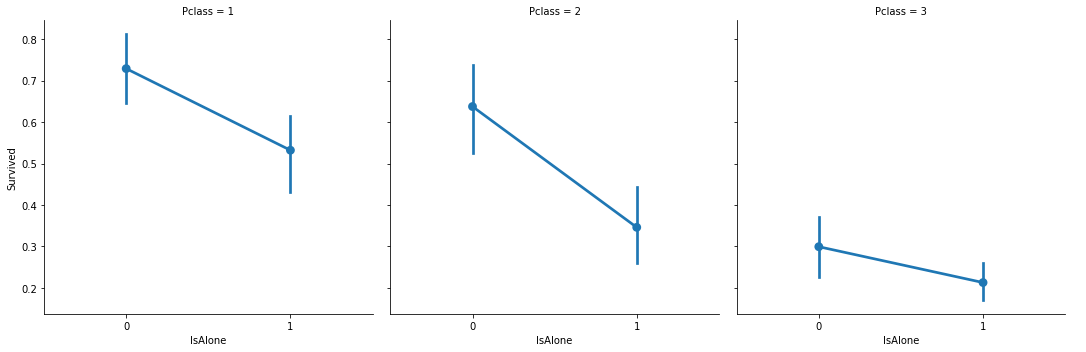

In [44]:
grid = sns.FacetGrid(test_feature_df, col='Pclass', height=5, aspect=1)
grid.map(sns.pointplot, 'IsAlone', 'Survived', ci=95)
grid.add_legend()

### Conclusions/decisions from above:

 - Being alone does seem to correlate with survival across all classes (3rd class just overall has a lower survival fraction)
 - Engineer `IsAlone` as a feature!

## Test binning of age and fare data

In [45]:
test_feature_df = train_df.copy()
num_bins = 10
test_feature_df['age_cat'] = pd.cut(test_feature_df['Age'], 
                                    num_bins, 
                                    #labels=[i for i in range(0,num_bins)]
                                   )

#test_feature_df['age_cat'] = (test_feature_df['age_cat']).astype(int)

(
    test_feature_df[['age_cat', 'Survived']]
    .groupby(['age_cat'], as_index=False)
    .mean()
    .sort_values(by='age_cat', ascending=True)
)

,age_cat,Survived
0,"(0.34, 8.378]",0.666667
1,"(8.378, 16.336]",0.413043
2,"(16.336, 24.294]",0.355932
3,"(24.294, 32.252]",0.384615
4,"(32.252, 40.21]",0.440678
5,"(40.21, 48.168]",0.342857
6,"(48.168, 56.126]",0.466667
7,"(56.126, 64.084]",0.375000
8,"(64.084, 72.042]",0.000000
9,"(72.042, 80.0]",0.500000


In [46]:
(
    test_feature_df[['age_cat', 'Survived']]
    .groupby(['age_cat'], as_index=False)
    .size()
)

age_cat
(0.34, 8.378]        54
(8.378, 16.336]      46
(16.336, 24.294]    177
(24.294, 32.252]    169
(32.252, 40.21]     118
(40.21, 48.168]      70
(48.168, 56.126]     45
(56.126, 64.084]     24
(64.084, 72.042]      9
(72.042, 80.0]        2
dtype: int64

In [47]:
test_feature_df = train_df.copy()
num_bins = 10
test_feature_df['fare_cat'] = pd.cut(test_feature_df['Fare'], 
                                     num_bins, 
                                     #labels=[i for i in range(0,num_bins)]
                                    )

#test_feature_df['fare_cat'] = (test_feature_df['fare_cat']).astype(int)

(
    test_feature_df[['fare_cat', 'Survived']]
    .groupby(['fare_cat'], as_index=False)
    .mean()
    .sort_values(by='fare_cat', ascending=True)
)

,fare_cat,Survived
0,"(-0.512, 51.233]",0.318306
1,"(51.233, 102.466]",0.660377
2,"(102.466, 153.699]",0.741935
3,"(153.699, 204.932]",1.000000
4,"(204.932, 256.165]",0.636364
5,"(256.165, 307.398]",0.666667
6,"(307.398, 358.63]",NaN
7,"(358.63, 409.863]",NaN
8,"(409.863, 461.096]",NaN
9,"(461.096, 512.329]",1.000000


In [48]:
(
    test_feature_df[['fare_cat', 'Survived']]
    .groupby(['fare_cat'], as_index=False)
    .size()
)

fare_cat
(-0.512, 51.233]      732
(51.233, 102.466]     106
(102.466, 153.699]     31
(153.699, 204.932]      2
(204.932, 256.165]     11
(256.165, 307.398]      6
(307.398, 358.63]       0
(358.63, 409.863]       0
(409.863, 461.096]      0
(461.096, 512.329]      3
dtype: int64

### Conclusions/decisions from above:

 - Bin ages and fares according to above
 - Should really put a ceiling on both, but for now, just do equal bins for the range of values in each feature

## Create and run data transformation pipeline

 - Use statistics of training set to fill values in training and test sets --> **I am assuming** the two sets come from the same distribution
 - Use same number of bins for training and test data when discretizing continuous variable features into bins --> **I am assuming** the two sets come from the same distribution
 - Use median age to fill missing values, for now
 - Use `Embarked` = S for filling missing values since it is the port with the most embarkations
 - Use median Fare to fill missing values, for now
 - Discretize and bin `Age` values into equal sized bins, for now
 - Discretize and bin `Fare` values into equal sized bins, for now
 - Categorize `Pclass` into binary features
 - Categorize `Embarked` into binary features
 - Categorize `Sex` into a binary feature
 - Drop `Name`, `Parch`, `Ticket`, and `Cabin` as discussed above (i.e. don't consider their value at all)

In [121]:
MEDIAN_AGE = None
MEDIAN_FARE = None
MEDIAN_EMBARKED = 'S'

In [122]:

def create_family_size_feature(df):
    df['num_family_travelling_with'] = df['SibSp'] + df['Parch'] + 1
    return df

def create_is_alone_feature(df):
    df['is_alone'] = (df['num_family_travelling_with'] == 1).astype(int)
    return df

def discretize_continuous_feature(df, new_column, column_to_bin, num_bins):
    df[new_column] = pd.cut(df[column_to_bin],
                            num_bins,
                            labels=[i for i in range(0,num_bins)]
                           )
    df[new_column] = (df[new_column]).astype(int)
    return df
    
def categorize_feature(df, new_column, old_column, old_column_value):
    def get_new_column_value(row, old_column, old_column_value):
        if row[old_column] == old_column_value:
            new_value = 1
        else:
            new_value = 0
        return new_value
    
    df[new_column] = df.apply(
        lambda row: get_new_column_value(row, old_column, old_column_value),
        axis=1
    )
    return df


# data transform pipeline
def transform_pipeline(df, data_set_type):
    # global is not great to use. Need to refactor pipeline into a class :( 
    global MEDIAN_AGE, MEDIAN_FARE, MEDIAN_EMBARKED
    
    # engineer family size feature
    df = create_family_size_feature(df)
    
    # engineer IsAlone feature
    df = create_is_alone_feature(df)
    
    # calculate median values of missing data columns if data_set_type = 'train'
    if data_set_type == 'train':
        MEDIAN_AGE = df['Age'].median()
        print('Median age of training data is {}'.format(MEDIAN_AGE))
        MEDIAN_FARE = df['Fare'].median()
        print('Median Fare of training data is {}'.format(MEDIAN_FARE))
        print('Median embarked is {}'.format(MEDIAN_EMBARKED))
        
    # Fill missing values with medians
    fill_na_dict = {
        'Age': MEDIAN_AGE,
        'Fare': MEDIAN_FARE,
        'Embarked': MEDIAN_EMBARKED
    }
    df = df.fillna(fill_na_dict)
    
    # discretize certian continuous variable features
    num_bins = 10
    # Age
    df = discretize_continuous_feature(df, 'age_cat', 'Age', num_bins)
    # Fare
    df = discretize_continuous_feature(df, 'fare_cat', 'Fare', num_bins)
    
    # Engineer categorical classification features into binary features
    new_column_list = ['is_first_class', 'is_second_class', 'is_third_class',
                       'embarked_S', 'embarked_C', 'embarked_Q',
                       'is_male']
    old_column_list = ['Pclass', 'Pclass', 'Pclass',
                       'Embarked', 'Embarked', 'Embarked',
                       'Sex']
    old_column_value_list = [1, 2, 3,
                             'S', 'C', 'Q',
                             'male']
    for new_column, old_column, old_column_value in zip(new_column_list,
                                                       old_column_list,
                                                       old_column_value_list):
        df = categorize_feature(df, new_column, old_column, old_column_value)
    
    
    
    # drop columns
    features_to_drop = ['Name', 
                        'Parch', 
                        'Ticket', 
                        'Cabin', 
                        'Pclass', 
                        'Embarked', 
                        'Sex', 
                        'Age', 
                        'Fare',
                        'PassengerId']
    df.drop(features_to_drop, axis=1, inplace=True)
    
    # rename columns
    df = df.rename(
        columns = {
            'SibSp': 'num_siblings_spouse',
        }
    )
    
    # assert no null values in dataframe
    assert pd.notnull(df).all().all()
    
    return df.values

In [123]:
train_labels = train_df['Survived'].copy()
train_prepared = transform_pipeline(train_df.drop(['Survived'], axis=1).copy(), 'train')

Median age of training data is 28.0
Median Fare of training data is 14.4542
Median embarked is S


In [126]:
train_prepared

array([[1, 2, 0, ..., 0, 0, 1],
       [1, 2, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 4, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 1],
       [0, 1, 1, ..., 0, 1, 1]])

In [127]:
train_prepared.shape

(891, 12)

In [128]:
train_labels.shape

(891,)

***
# 4. Select, train, and fine-tune model

In [129]:
# import sklearn stuff
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

In [139]:
log_reg = LogisticRegression()

hyper_param_distribs = {
    'penalty': ['l1', 'l2'],
    'dual': [False],
    'tol': [1e-4],
    'C': uniform(loc=0, scale=4),
    'fit_intercept': [True, False],
    'intercept_scaling': [1.0],
    'class_weight': [None],
    'random_state': [None],
    'solver': ['liblinear'],
    'max_iter': [100],
    'multi_class': ['ovr'],
    'verbose': [0],
    'warm_start': [False],
    'n_jobs': [None]
}

rnd_search = RandomizedSearchCV(
    log_reg, 
    hyper_param_distribs, 
    n_iter=1000, 
    scoring='accuracy', 
    cv=10, 
    verbose=1, 
    random_state=78, 
    n_jobs=1, 
    error_score=np.nan 
)

In [140]:
rnd_search.fit(train_prepared, train_labels)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:   41.8s finished
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=10, error_score=nan,
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=1000, n_jobs=1,
          param_distributions={'penalty': ['l1', 'l2'], 'dual': [False], 'tol': [0.0001], 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a2aac8860>, 'fit_intercept': [True, False], 'intercept_scaling': [1.0], 'class_weight': [None], 'random_state': [None], 'solver': ['liblinear'], 'max_iter': [100], 'multi_class': ['ovr'], 'verbose': [0], 'warm_start': [False], 'n_jobs': [None]},
          pre_dispatch='2*n_jobs', random_state=78, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=1)

In [141]:
rnd_search.best_params_

{'C': 0.9043477454988103,
 'class_weight': None,
 'dual': False,
 'fit_intercept': False,
 'intercept_scaling': 1.0,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [142]:
rnd_search.best_estimator_

LogisticRegression(C=0.9043477454988103, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1.0, max_iter=100,
          multi_class='ovr', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [143]:
rnd_search.best_score_

0.797979797979798

In [151]:
#cv_results = rnd_search.cv_results_
#for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
#    print(mean_score, params)

***
# 5. Evaluate model on test set

In [146]:
# define best model
final_model = rnd_search.best_estimator_
# prepare (transform) test data
test_IDs = test_df['PassengerId'].copy()
test_prepared = transform_pipeline(test_df.copy(), 'test')

test_prepared.shape

(418, 12)

In [148]:
# make predictions for test data
test_predictions = final_model.predict(test_prepared)

In [150]:
# print submission
submission = pd.DataFrame({
    'PassengerId': test_IDs,
    'Survived': test_predictions
})
submission.to_csv('submission_logistic_regression.csv', index=False)
